# **WINE QUALITY PREDICTION**

__Installing Pandas__

In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


__Importing Libraries & Modules__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier


__Importing Dataset__

In [3]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

__Converting Dataset to DataFrame__

In [4]:
wine_df = pd.DataFrame(data = np.c_[wine.data,wine.target],columns = wine.feature_names+["quality"])
data = wine_df.copy()
data.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0,1.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0,0.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1.0
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0,0.0
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0,2.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0.0
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,0.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0.0
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0,0.0


In [5]:
data["quality"].value_counts()

1.0    71
0.0    59
2.0    48
Name: quality, dtype: int64

__PRINTING DATA INFO__

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  quali

__DESCRIBING DATA__

In [20]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


__ASSIGNING X & y__

In [6]:
X = data.drop(["quality"],axis = 1)
y = data["quality"]

__Feature Importance__

In [7]:
classifiern= ExtraTreesClassifier()
classifiern.fit(X,y)
score = classifiern.feature_importances_
print(score)

[0.12446427 0.04378906 0.02406223 0.03464381 0.03214829 0.06547476
 0.13941005 0.02541973 0.03375219 0.13016933 0.08106364 0.10892079
 0.15668184]


__Reassigning X and y__

In [8]:
X = data.drop(["ash","alcalinity_of_ash","magnesium","nonflavanoid_phenols","proanthocyanins"],axis=1)
y = data["quality"]

__Splitting Data and Fitting Linear Regression Model__

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

__R-Squared Coefficient & Mean Squared Error__

In [11]:
mse = mean_squared_error(y_test,y_pred)*100
r2 = r2_score(y_test,y_pred)*100
print("Mean Squared Error is :",mse)
print("R squared (Coefficient of Determination ): ",r2)

Mean Squared Error is : 7.180772731137047e-25
R squared (Coefficient of Determination ):  100.0


# **PLOTTING**

__COUNTPLOT__

<AxesSubplot:xlabel='quality', ylabel='count'>

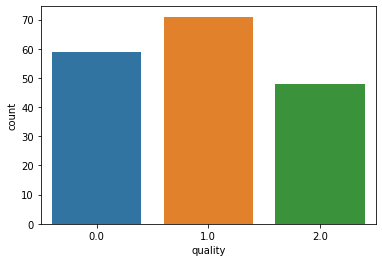

In [12]:
sns.countplot(x = "quality",data = data)

In [14]:
X

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.80,3.06,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.65,2.76,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.80,3.24,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,3.85,3.49,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.80,2.69,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,1.80,0.75,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,1.59,0.69,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,1.65,0.68,9.30,0.60,1.62,840.0,2.0


In [15]:
d1=  X.iloc[:, list(range(4)) + [-1]]
d2 = X.iloc[:,4:9]

__PAIR PLOT__

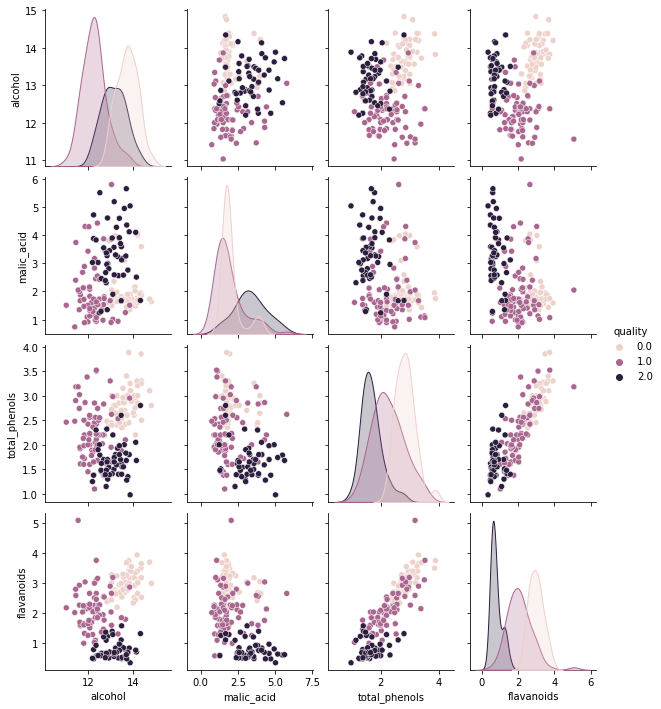

In [16]:
sns.pairplot(
    data=d1, 
    aspect=.85,
    hue='quality')

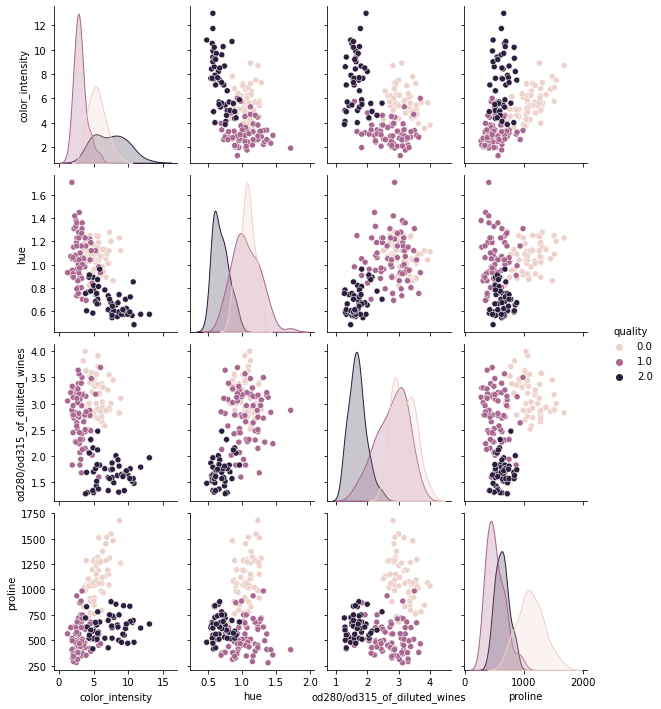

In [17]:
sns.pairplot(
    data=d2, 
    aspect=.85,
    hue='quality')